# Lab 3 — clustering

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.cluster import KMeans

%matplotlib inline
plt.style.use("ggplot")

In [2]:
#Load from pickle
with open('tags_mapped.pickle', 'rb') as handle:
    tags_mapped = pickle.load(handle, encoding='utf-8')

In [3]:
with open('tag_embedding.pickle', 'rb') as handle:
    tag_embedding = pickle.load(handle, encoding='utf-8')

In [4]:
len(tags_mapped)

1128

In [5]:
tag_embedding.shape

(1128, 5)

### Exercise 3.11 Clustering tags


• Cluster the data using the k-means clustering algorithm. Try k∈{2,...,5}.

• Visualize the clusters using an interactive bokeh plot.

In [6]:
def fit_and_plot_kmeans(tag_embedding, k=2):
    
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(tag_embedding)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 1     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = tag_embedding[:, 0].min() - 1, tag_embedding[:, 0].max() + 1
    y_min, y_max = tag_embedding[:, 1].min() - 1, tag_embedding[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(tag_embedding.min(), tag_embedding.max(), h), np.arange(tag_embedding.min(), tag_embedding.max(), h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel(), yy.ravel(), xx.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(tag_embedding[:, 0], tag_embedding[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the embedded dataset (PCA-reduced movies data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
    return kmeans.fit_predict(tag_embedding), kmeans

In [7]:
def kmeans_hist(prediction):
    plt.hist(prediction)
    plt.title("Distribution of lables on KMeans")
    plt.xlabel('Class Label')
    plt.ylabel('Number of points')
    plt.show()

In [8]:
import bokeh.plotting
from bokeh.plotting import figure
from sklearn import datasets

def kmeans_bokeh(tag_embedding, kmean, primary_selected_component=0, secondary_selected_component=1):
    bokeh.plotting.output_notebook()

    #initialize our bokeh plot
    plot = figure(width=500, height=500, title='K-means clustering on the embedded dataset (PCA-reduced movies data)', x_axis_label = "Primary Selected Principal Component", y_axis_label = "Secondary Selected Principal Component")

    #plot centroid / cluster center / group mean for each group
    clus_xs = kmean.cluster_centers_[0]
    clus_ys = kmean.cluster_centers_[1]
    
    colors = ["red", "green", "blue", "purple", "orange"]
    
    for label in np.unique(kmean.labels_):
        indices = np.where(kmean.labels_ == label)[0]
        color = colors[label]
        x_samples = tag_embedding[indices, primary_selected_component]
        y_samples = tag_embedding[indices, secondary_selected_component]
        plot.circle(x=x_samples, y=y_samples, size=5, color=color)
        
    bokeh.plotting.show(plot)

#### k=2, First and Second Principal Components

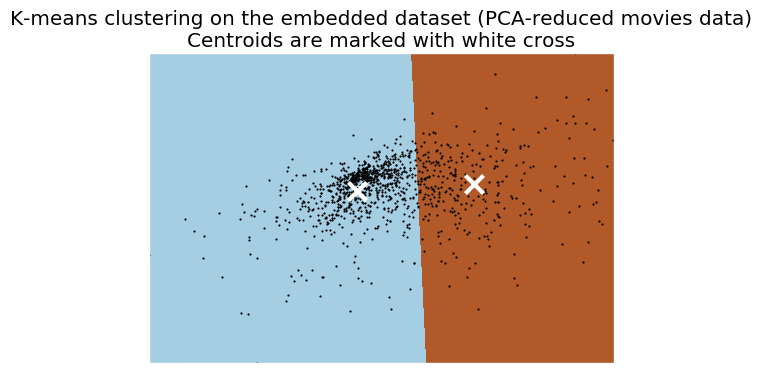

In [9]:
pred, kmeans2 = fit_and_plot_kmeans(tag_embedding, k=2)

In [10]:
kmeans_bokeh(tag_embedding, kmeans2, 0, 1)

Loading BokehJS ...

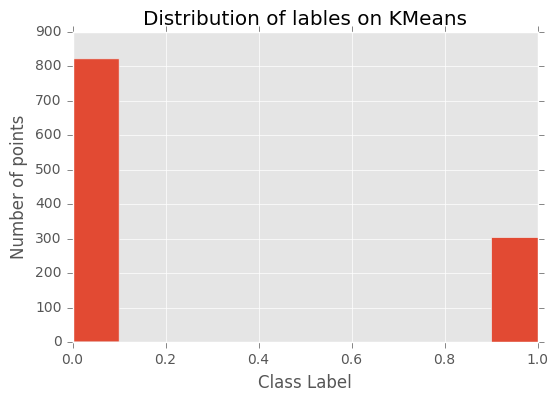

In [11]:
kmeans_hist(pred)

#### k=3, First and Second Principal Components

In [13]:
kmeans3 = KMeans(init='k-means++', n_clusters=3)
kmeans3.fit(tag_embedding)
pred = kmeans3.fit_predict(tag_embedding)

In [14]:
kmeans_bokeh(tag_embedding, kmeans3, 0, 1)

Loading BokehJS ...

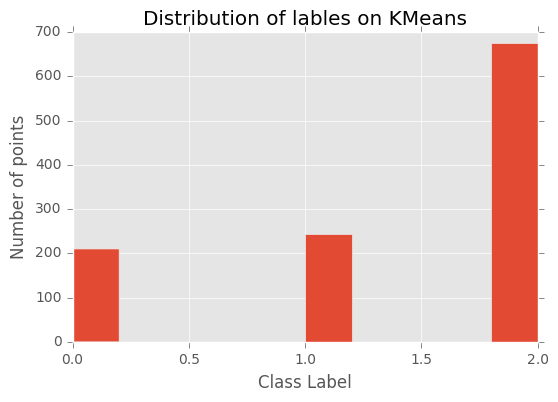

In [15]:
kmeans_hist(pred)

#### k=4, First and Second Principal Components

In [16]:
kmeans4 = KMeans(init='k-means++', n_clusters=4)
kmeans4.fit(tag_embedding)
pred = kmeans4.fit_predict(tag_embedding)

In [17]:
kmeans_bokeh(tag_embedding, kmeans4, 0, 1)

Loading BokehJS ...

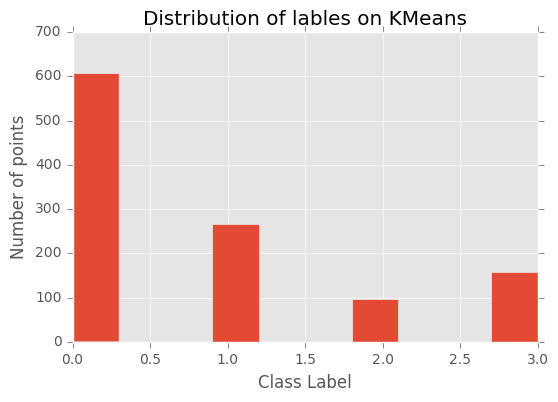

In [18]:
kmeans_hist(pred)

#### k=5, First and Second Principal Components

In [19]:
kmeans5 = KMeans(init='k-means++', n_clusters=5)
kmeans5.fit(tag_embedding)
pred = kmeans5.fit_predict(tag_embedding)

In [20]:
kmeans_bokeh(tag_embedding, kmeans5, 0, 1)

Loading BokehJS ...

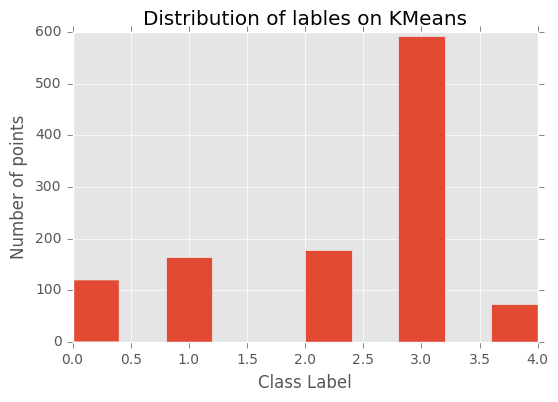

In [21]:
kmeans_hist(pred)

#### • Try projecting on different principal directions.

Since First Principal Direction seemes to seperate the data quite well, let's stick to it and check out other Principal Directions, apart from Second, which already was tested. Moreover, since our tag are embedded into 5 dminesional space it come quite naturally to check k-means for k=5.

In [38]:
kmeans_bokeh(tag_embedding, kmeans5, 0, 2)

Loading BokehJS ...

Green seems to be slightly occluded by purple cluster however seperation is still quite clear on this projection.

In [39]:
kmeans_bokeh(tag_embedding, kmeans5, 0, 3)

Loading BokehJS ...

Blue seems to be occluding red cluster significantly thus this is not the best projection for this data.

In [40]:
kmeans_bokeh(tag_embedding, kmeans5, 0, 4)

Loading BokehJS ...

Again blue occuding red cluster.

In [41]:
kmeans_bokeh(tag_embedding, kmeans5, 1, 2)

Loading BokehJS ...

We veriefied that projections on higher principal directions starting from 1 and 2, yields poor results just as visualised above. Thus we come to the conclusion that projecting the data onto two first principal directions separates data in the most efficient manner. It is a reasonable conclusion, considering that two first principal components capture most of the data variability.

### Exercise 3.12 Clustering movies

Create a dict that maps movie IDs to set of genres from the data in movies.txt.

In [42]:
with open('most-rated.pickle', 'rb') as handle:
    most_rated = pickle.load(handle, encoding='utf-8')

In [53]:
movies_rdd = sc.textFile("/ix/ml-20m/movies.txt").map(json.loads)
movies_df = movies_rdd.toDF(['genres', 'movieId', 'title'])

/usr/hdp/2.5.3.0-37/spark/python/pyspark/sql/context.py:259: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [59]:
most_rated_genres = {}

# probably not the most efficient way to do this but acceptable since its only 1k movies.
for movie in most_rated:
    most_rated_genres[movie[0]] = movies_df.where('movieId = ' + str(movie[0])).collect()[0]['genres']

• Implement the k-medioids algorithm with the Jaccard distance.

In [61]:
most_rated_genres

{1: ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 2: ['Adventure', 'Children', 'Fantasy'],
 3: ['Comedy', 'Romance'],
 5: ['Comedy'],
 6: ['Action', 'Crime', 'Thriller'],
 7: ['Comedy', 'Romance'],
 4105: ['Fantasy', 'Horror', 'Thriller'],
 10: ['Action', 'Adventure', 'Thriller'],
 11: ['Comedy', 'Drama', 'Romance'],
 2313: ['Drama'],
 14: ['Drama'],
 16: ['Crime', 'Drama'],
 17: ['Drama', 'Romance'],
 18: ['Comedy'],
 19: ['Comedy'],
 21: ['Comedy', 'Crime', 'Thriller'],
 22: ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 2393: ['Action', 'Drama', 'Romance', 'Sci-Fi'],
 24: ['Drama', 'Sci-Fi'],
 25: ['Drama', 'Romance'],
 2076: ['Drama', 'Mystery', 'Thriller'],
 68954: ['Adventure', 'Animation', 'Children', 'Drama'],
 2078: ['Animation', 'Children', 'Comedy', 'Musical'],
 31: ['Drama'],
 32: ['Mystery', 'Sci-Fi', 'Thriller'],
 2081: ['Animation', 'Children', 'Comedy', 'Musical', 'Romance'],
 34: ['Children', 'Drama'],
 36: ['Crime', 'Drama'],
 2054: ['Adventure'

In [89]:
from __future__ import division

def jaccard_distance(medioid, point):
    med = set(medioid)
    p = set(point)
    
    nominator = len(set.intersection(med, p))
    denominator = len(set.union(med, p))
    
    J = nominator / denominator
    distance = 1.0 - J
    return distance

In [162]:
import random
import copy

def k_medioids(points, distance_function, k):
    clusters = {}
    for cluster in range(k): # for i = 0 ,... , k-1
        random_key = random.choice(list(points.keys()))
        clusters[cluster] = points[random_key]
    i = 1
    distances_sum = np.array([0 for i in range(k)])
    while(True):
        Cs = {}
        for cluster in range(k):
            Cs[cluster] = []
        for point_key, point_value in points.items():
            distances = []
            for cluster_key, cluster_val in clusters.items():
                dist = distance_function(cluster_val, point_value)
                distances.append(dist)
            i = np.argmin(distances)
            Cs[i] += [point_key]
            
        old_clusters = copy.deepcopy(clusters)
        old_distances_sum = copy.deepcopy(distances_sum)
        
        for cluster in range(k):
            Ci = Cs[cluster]
            
            min_distances = []
            for point_id in Ci:
                distance_sum = 0.0
                x_in_Ci = points[point_id]
                for point_id_2 in Ci:
                    y_in_Ci = points[point_id_2]
                    distance_sum += distance_function(x_in_Ci, y_in_Ci)
                min_distances += [distance_sum]
            distances_sum[cluster] = np.sum(min_distances)
            new_medioid_id = Ci[np.argmin(min_distances)]
            clusters[cluster] = points[new_medioid_id]
        i += 1
        if old_clusters == clusters and np.abs(np.sum(distances_sum-old_distances_sum)) < 1e-6:
            print('Convergence after {} steps.'.format(i))
            print(np.abs(np.sum(distances_sum-old_distances_sum)) )
            break
    return clusters, Cs

In [163]:
clusters, points = k_medioids(most_rated_genres, jaccard_distance, 2)

Convergence after 2 steps.
0


In [164]:
clusters

{0: ['Comedy', 'Drama'], 1: ['Action', 'Adventure', 'Sci-Fi', 'Thriller']}